<a href="https://colab.research.google.com/github/tomilolaoke/Dissertation/blob/main/Prediction_of_Life_Expectancy_Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preduction of Life Expectancy with Full Dataset

In [1]:
#Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics, preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from plotly.subplots import make_subplots
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
#Read the dataset
data = pd.read_csv('/content/world-data-2023 (1).csv')
data.head()#[1]

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [3]:

#List of features with object data type
object_list = [x for x in data.columns if data[x].dtype == 'object']

# List of features in which the '%' sign is indicated
object_list_percent = [x for x in object_list if '%' in x]+(['Out of pocket health expenditure', 'Total tax rate', 'Unemployment rate'])
print(object_list_percent)

# Remove the '%' sign and change the data type to float
for feature in data.columns:
    if feature in object_list_percent:
        data[feature] = data[feature].str.replace('%', '')
        data[feature] = data[feature].str.strip()
        data[feature] = data[feature].astype('float64')#[2]

['Agricultural Land( %)', 'CPI Change (%)', 'Forested Area (%)', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Out of pocket health expenditure', 'Total tax rate', 'Unemployment rate']


percentage sign was removed

In [4]:
# List of features with object data type
object_list = [x for x in data.columns if data[x].dtype == 'object']
object_list

['Country',
 'Density\n(P/Km2)',
 'Abbreviation',
 'Land Area(Km2)',
 'Armed Forces size',
 'Capital/Major City',
 'Co2-Emissions',
 'CPI',
 'Currency-Code',
 'Gasoline Price',
 'GDP',
 'Largest city',
 'Minimum wage',
 'Official language',
 'Population',
 'Urban_population']

In [5]:
# List of features to be transformed
columns_list = ['Density\n(P/Km2)', 'Land Area(Km2)', 'Armed Forces size', 'Co2-Emissions', 'CPI',
           'Gasoline Price', 'GDP', 'Minimum wage', 'Population', 'Urban_population']

# Remove ',' and '$'
for feature in data.columns:
    if feature in columns_list:
        data[feature] = data[feature].str.replace(',', '')
        data[feature] = data[feature].str.replace('$', '')

# Replacing data types with int and float
float_list = ['CPI', 'Gasoline Price', 'Minimum wage']
int_list = ['Density\n(P/Km2)', 'Land Area(Km2)', 'Armed Forces size', 'Co2-Emissions', 'GDP', 'Population', 'Urban_population']
for feature in data.columns:
    if feature in float_list:
        data[feature] = data[feature].astype('float64')
    elif feature in int_list:
        data[feature] = data[feature].astype('Int64')#[2]

In [6]:
# Percentage of missing data in features
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
cols = list(cols_with_null.index)
display(cols_with_null)

,0
Minimum wage,23.076923
Tax revenue (%),13.333333
Armed Forces size,12.307692
Gasoline Price,10.256410
Unemployment rate,9.743590
Population: Labor force participation (%),9.743590
CPI,8.717949
CPI Change (%),8.205128
Currency-Code,7.692308
Maternal mortality ratio,7.179487


In [7]:

#create a list of categorical variables
cat_list = [x for x in data.columns if data[x].dtype == 'object']
cat_list#[2]

['Country',
 'Abbreviation',
 'Capital/Major City',
 'Currency-Code',
 'Largest city',
 'Official language']

In [8]:
#[2]
#Encode categorical variables
for feature in cat_list:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])

In [9]:
#Impute unknown for missing categorical variables
data[cat_list] = data[cat_list].fillna('unknown')
#impute 0 to fill nas
data = data.fillna(0)
data.isnull().sum()

,0
Country,0
Density\n(P/Km2),0
Abbreviation,0
Agricultural Land( %),0
Land Area(Km2),0
Armed Forces size,0
Birth Rate,0
Calling Code,0
Capital/Major City,0
Co2-Emissions,0


Descriptive statistics

In [10]:
#Generate summary
descr_stats=data.describe()
descr_stats


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,195.000000,195.0,195.000000,195.000000,195.0,195.0,195.000000,195.000000,195.000000,195.0,...,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000
mean,97.000000,356.764103,96.892308,37.713333,686087.830769,139671.794872,19.592974,358.697436,96.984615,171416.702564,...,31.465641,1.773795,39179209.323077,56.625128,14.364103,38.310256,6.215385,21732631.851282,18.994442,20.128678
std,56.435804,1982.888967,56.256717,22.596702,1917286.358734,360149.002633,10.397534,323.434462,56.409537,824185.848501,...,19.783417,1.688826,144745434.615178,21.152722,8.595080,22.208406,5.240580,74535966.752995,23.939018,66.559711
min,0.000000,2.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-40.900557,-175.198242
25%,48.500000,35.5,48.500000,19.800000,23083.0,4500.0,10.675000,81.500000,48.500000,1901.5,...,15.700000,0.245000,1916855.5,52.900000,9.500000,28.500000,2.555000,950418.0,4.372880,-7.658537
50%,97.000000,89.0,97.000000,39.200000,118484.0,23000.0,17.800000,255.000000,97.000000,10715.0,...,28.400000,1.300000,8776109.0,61.600000,14.700000,36.600000,4.670000,4359150.0,17.189877,20.939444
75%,145.500000,216.5,145.500000,54.850000,520544.0,123000.0,28.445000,506.500000,145.500000,61941.0,...,43.750000,2.875000,28562269.5,68.300000,20.300000,47.300000,8.840000,14601389.5,40.106102,48.046657
max,194.000000,26337.0,188.000000,82.600000,17098240.0,3031000.0,46.080000,1876.000000,192.000000,9893038.0,...,81.600000,8.420000,1397715000.0,86.800000,37.200000,219.600000,28.180000,842933962.0,64.963051,178.065032


In [11]:
from google.colab import files
##Save descriptive statistics
#descr_stats.to_csv('descriptive stat.csv')
#files.download('descriptive stat.csv')

In [12]:
#select features
features = ['GDP', 'Physicians per thousand', 'Co2-Emissions','Gross primary education enrollment (%)',
'Gross tertiary education enrollment (%)','Population', 'Fertility Rate', 'Infant mortality']

In [13]:
numericals=['Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate',
              'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
        'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate','Urban_population','Latitude','Longitude']

In [14]:
numerical_var=data[numericals]

In [15]:
numerical_var.head()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,60,58.1,652230,323000,32.49,8672,149.90,2.3,4.47,2.1,...,78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273,33.939110,67.709953
1,105,43.1,28748,9000,11.78,4536,119.05,1.4,1.62,28.1,...,56.9,1.20,2854191,55.7,18.6,36.6,12.33,1747593,41.153332,20.168331
2,18,17.4,2381741,317000,24.28,150006,151.36,2.0,3.02,0.8,...,28.1,1.72,43053054,41.2,37.2,66.1,11.70,31510100,28.033886,1.659626
3,164,40.0,468,0,7.20,469,0.00,0.0,1.27,34.0,...,36.4,3.33,77142,0.0,0.0,0.0,0.00,67873,42.506285,1.521801
4,26,47.5,1246700,117000,40.73,34693,261.73,17.1,5.52,46.3,...,33.4,0.21,31825295,77.5,9.2,49.1,6.89,21061025,-11.202692,17.873887


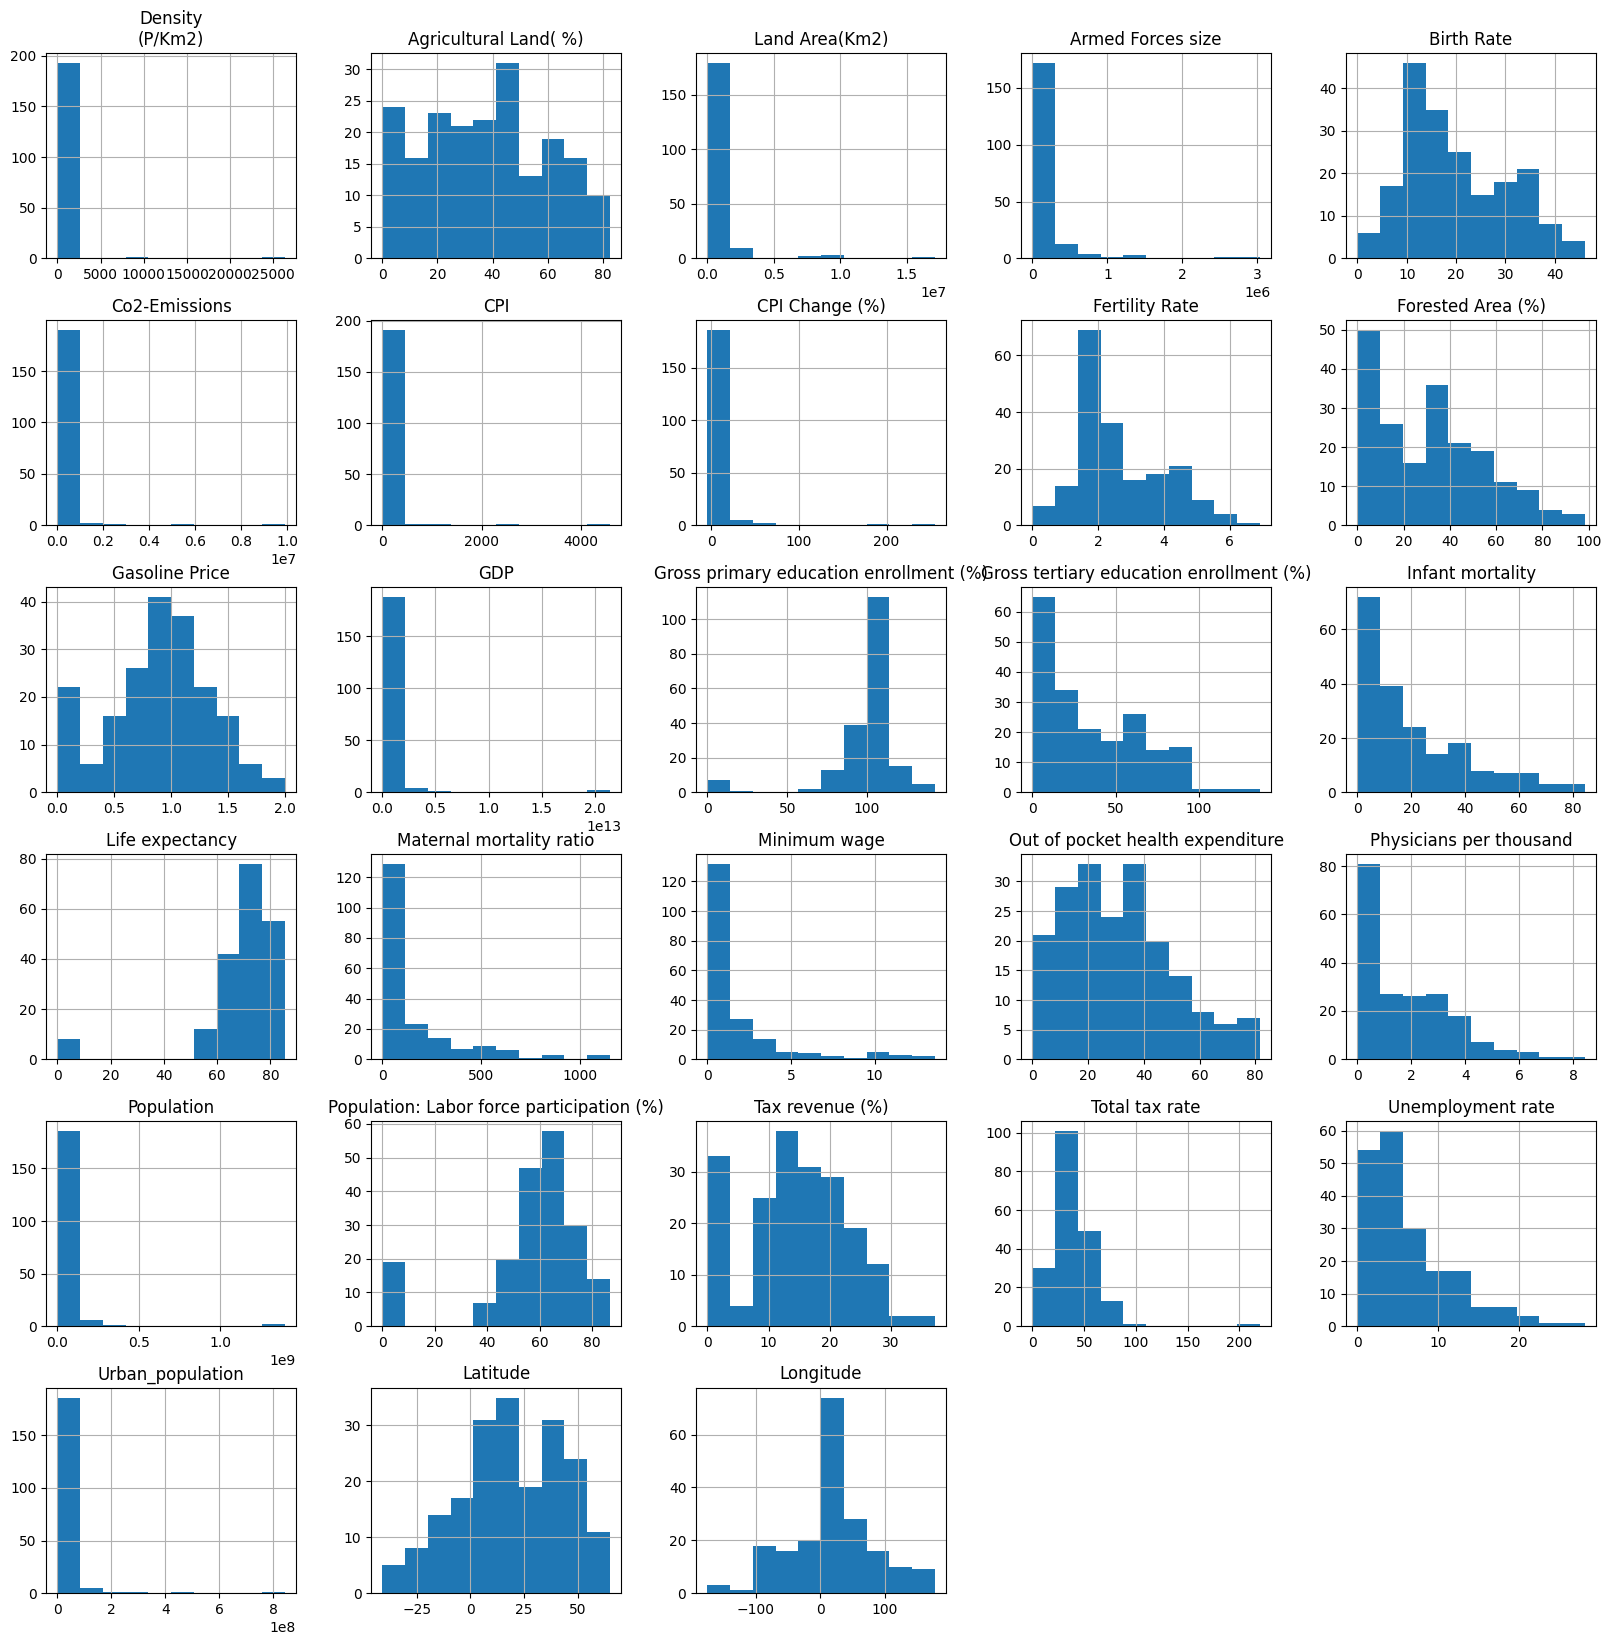

In [16]:
#Histogram of numerical variables
numerical_var.hist(figsize=(20,20))
plt.show()
#plt.savefig('numerical variable distribution')

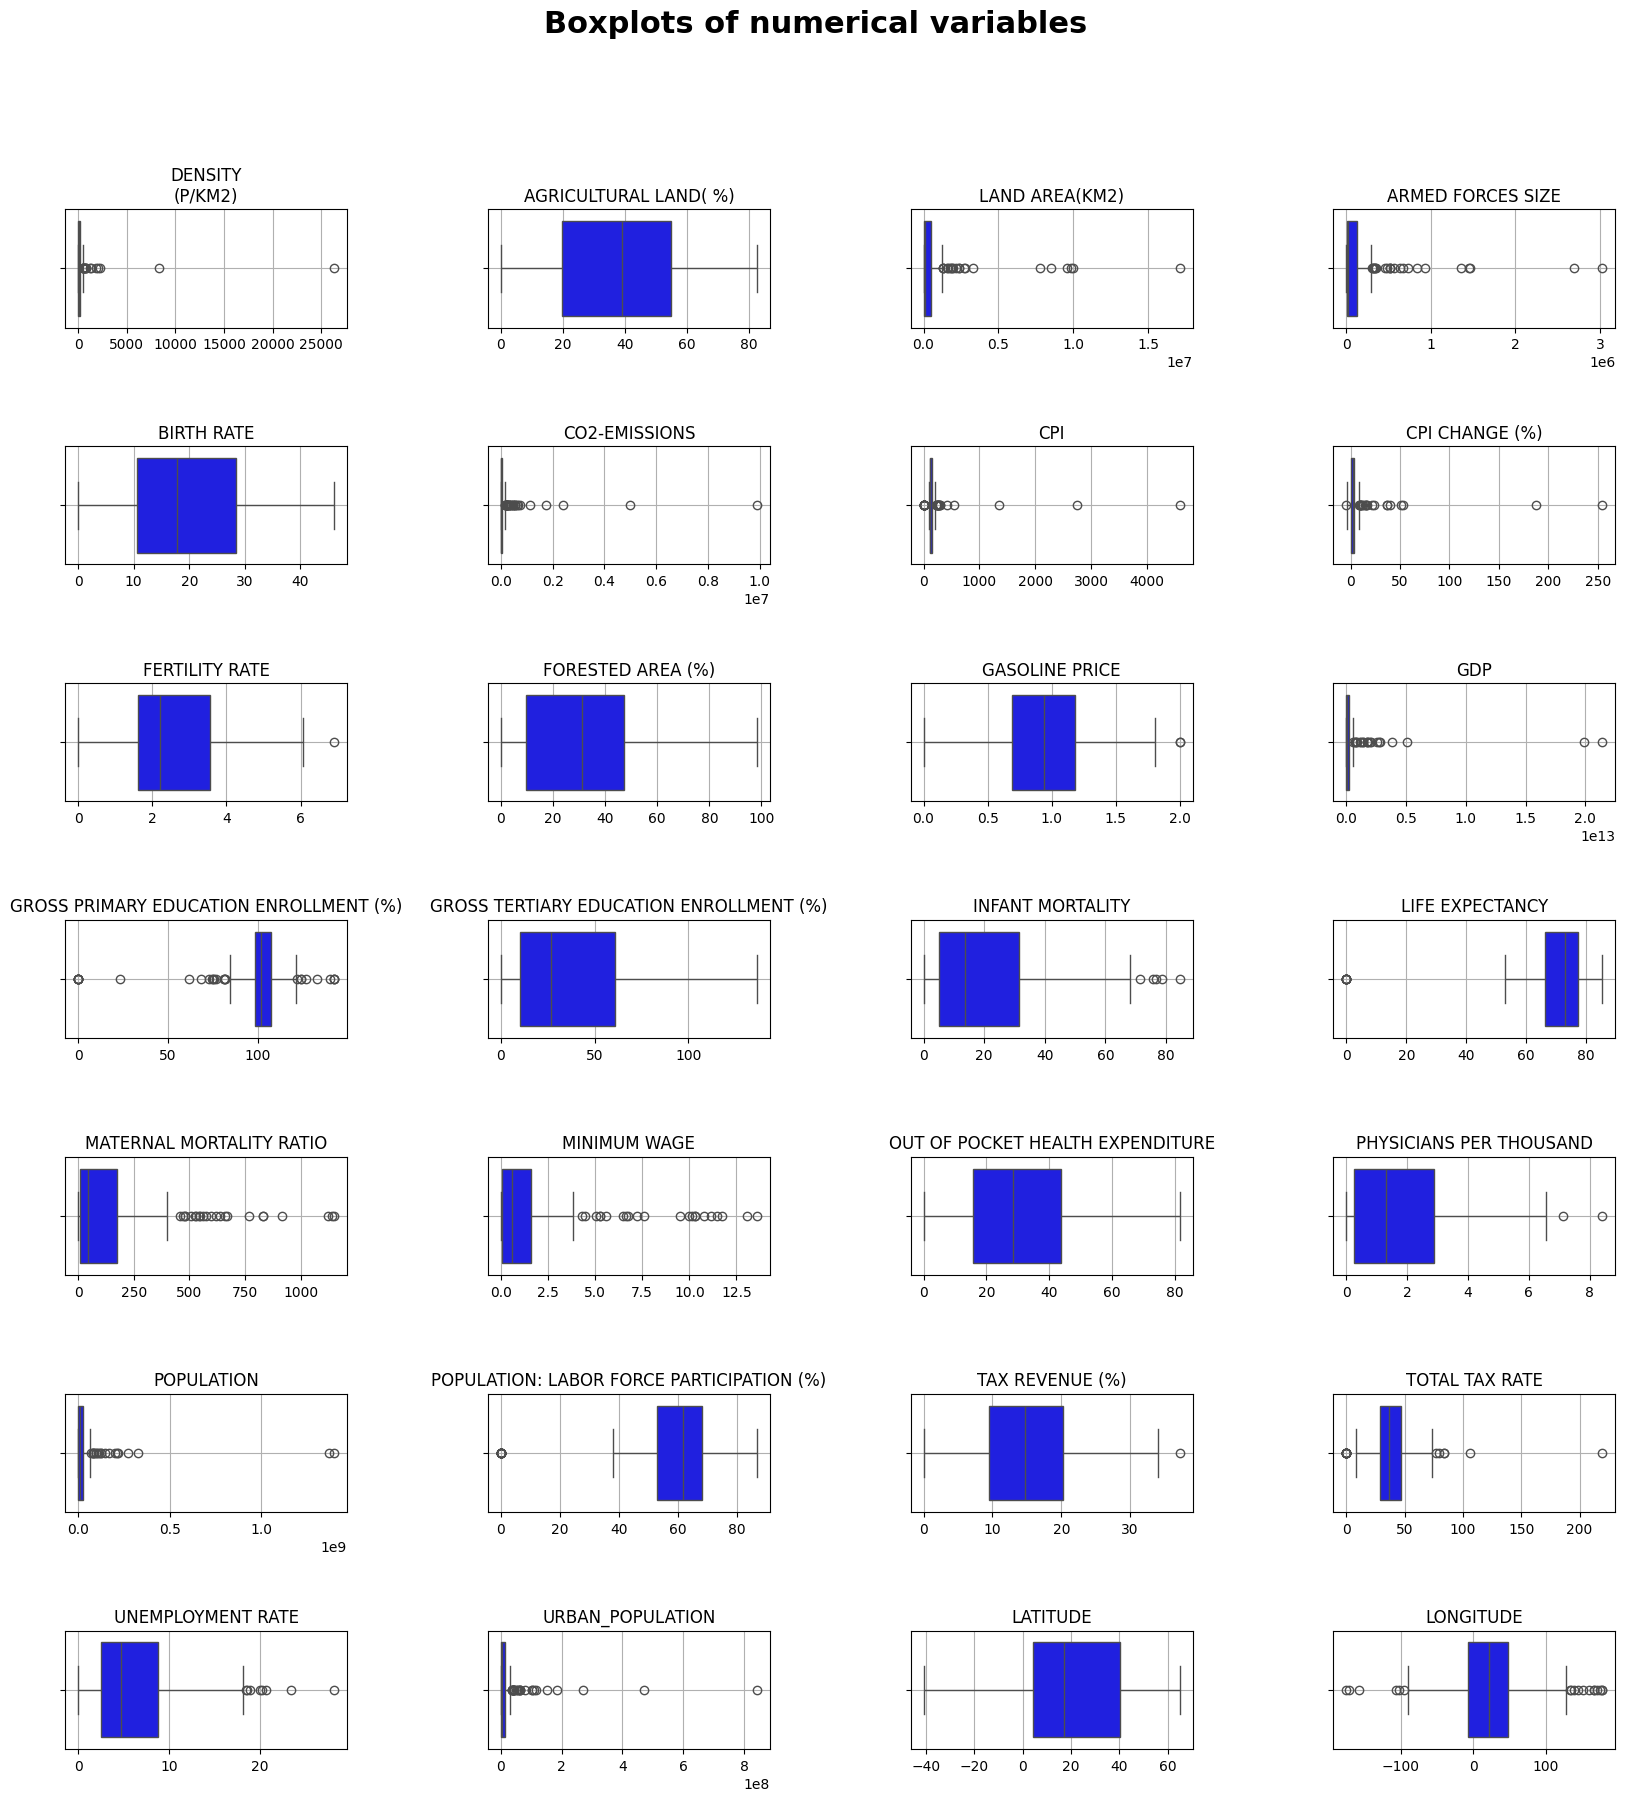

In [17]:
#[2]
#Generate box plot for all numerical variables
fig, axes = plt.subplots(7, 4, figsize=(20, 20), facecolor='white')
plt.subplots_adjust(hspace=1.0, wspace=0.5)
plt.suptitle('Boxplots of numerical variables',
             fontsize=22,
             fontweight='bold')
for col, ax in zip(numerical_var, axes.ravel()):
    histplot = sns.boxplot(numerical_var,
                            x=col,
                            color='blue',
                            ax=ax)
    histplot.set_title(col.upper())
    histplot.set_xlabel('')
    ax.grid()

In [18]:
numerica_cormat=numerical_var.corr()
numerica_cormat

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Density\n(P/Km2),1.000000,-0.156662,-0.053711,-0.029638,-0.147221,-0.020301,-0.046765,-0.036145,-0.188738,-0.126212,...,-0.093781,0.197559,-0.017946,-0.196911,-0.124375,-0.150799,-0.122379,-0.023715,0.064801,0.032034
Agricultural Land( %),-0.156662,1.000000,-0.010307,0.060656,0.248456,0.071776,-0.098833,-0.072449,0.236672,-0.318511,...,0.156093,-0.000456,0.127115,0.160885,0.024668,0.196758,0.137802,0.114028,-0.036495,-0.038575
Land Area(Km2),-0.053711,-0.010307,1.000000,0.560414,-0.040985,0.591637,0.033250,0.040888,-0.034531,0.000886,...,0.004275,0.082415,0.446990,0.100259,-0.073431,0.114133,0.085120,0.548043,0.049569,0.010564
Armed Forces size,-0.029638,0.060656,0.560414,1.000000,-0.099359,0.742100,0.047195,0.066998,-0.102253,-0.026870,...,0.135512,0.033542,0.876850,0.075896,-0.116277,0.084950,0.023771,0.852899,0.129511,0.169165
Birth Rate,-0.147221,0.248456,-0.040985,-0.099359,1.000000,-0.129540,0.159950,0.113818,0.982549,-0.004202,...,0.298416,-0.620736,-0.034026,0.331563,-0.199034,0.284587,0.077550,-0.083661,-0.452703,-0.014659
Co2-Emissions,-0.020301,0.071776,0.591637,0.742100,-0.129540,1.000000,-0.008853,0.000603,-0.114736,-0.016308,...,-0.015850,0.060915,0.810285,0.053908,-0.060615,0.077461,0.032694,0.926310,0.114640,0.071161
CPI,-0.046765,-0.098833,0.033250,0.047195,0.159950,-0.008853,1.000000,0.893913,0.157546,-0.056244,...,0.177286,-0.104357,0.004944,0.099684,-0.150121,0.082905,0.155453,0.001421,-0.083739,-0.043549
CPI Change (%),-0.036145,-0.072449,0.040888,0.066998,0.113818,0.000603,0.893913,1.000000,0.104504,-0.028716,...,0.142736,-0.071546,0.010940,0.063177,-0.186545,0.129814,0.136506,0.013139,-0.091016,-0.084564
Fertility Rate,-0.188738,0.236672,-0.034531,-0.102253,0.982549,-0.114736,0.157546,0.104504,1.000000,0.010972,...,0.258399,-0.574907,-0.032233,0.316707,-0.183831,0.293906,0.049471,-0.075539,-0.414739,-0.019062
Forested Area (%),-0.126212,-0.318511,0.000886,-0.026870,-0.004202,-0.016308,-0.056244,-0.028716,0.010972,1.000000,...,-0.184453,-0.055930,-0.041520,0.031127,0.149723,0.115089,-0.089810,-0.019896,-0.139654,0.013765


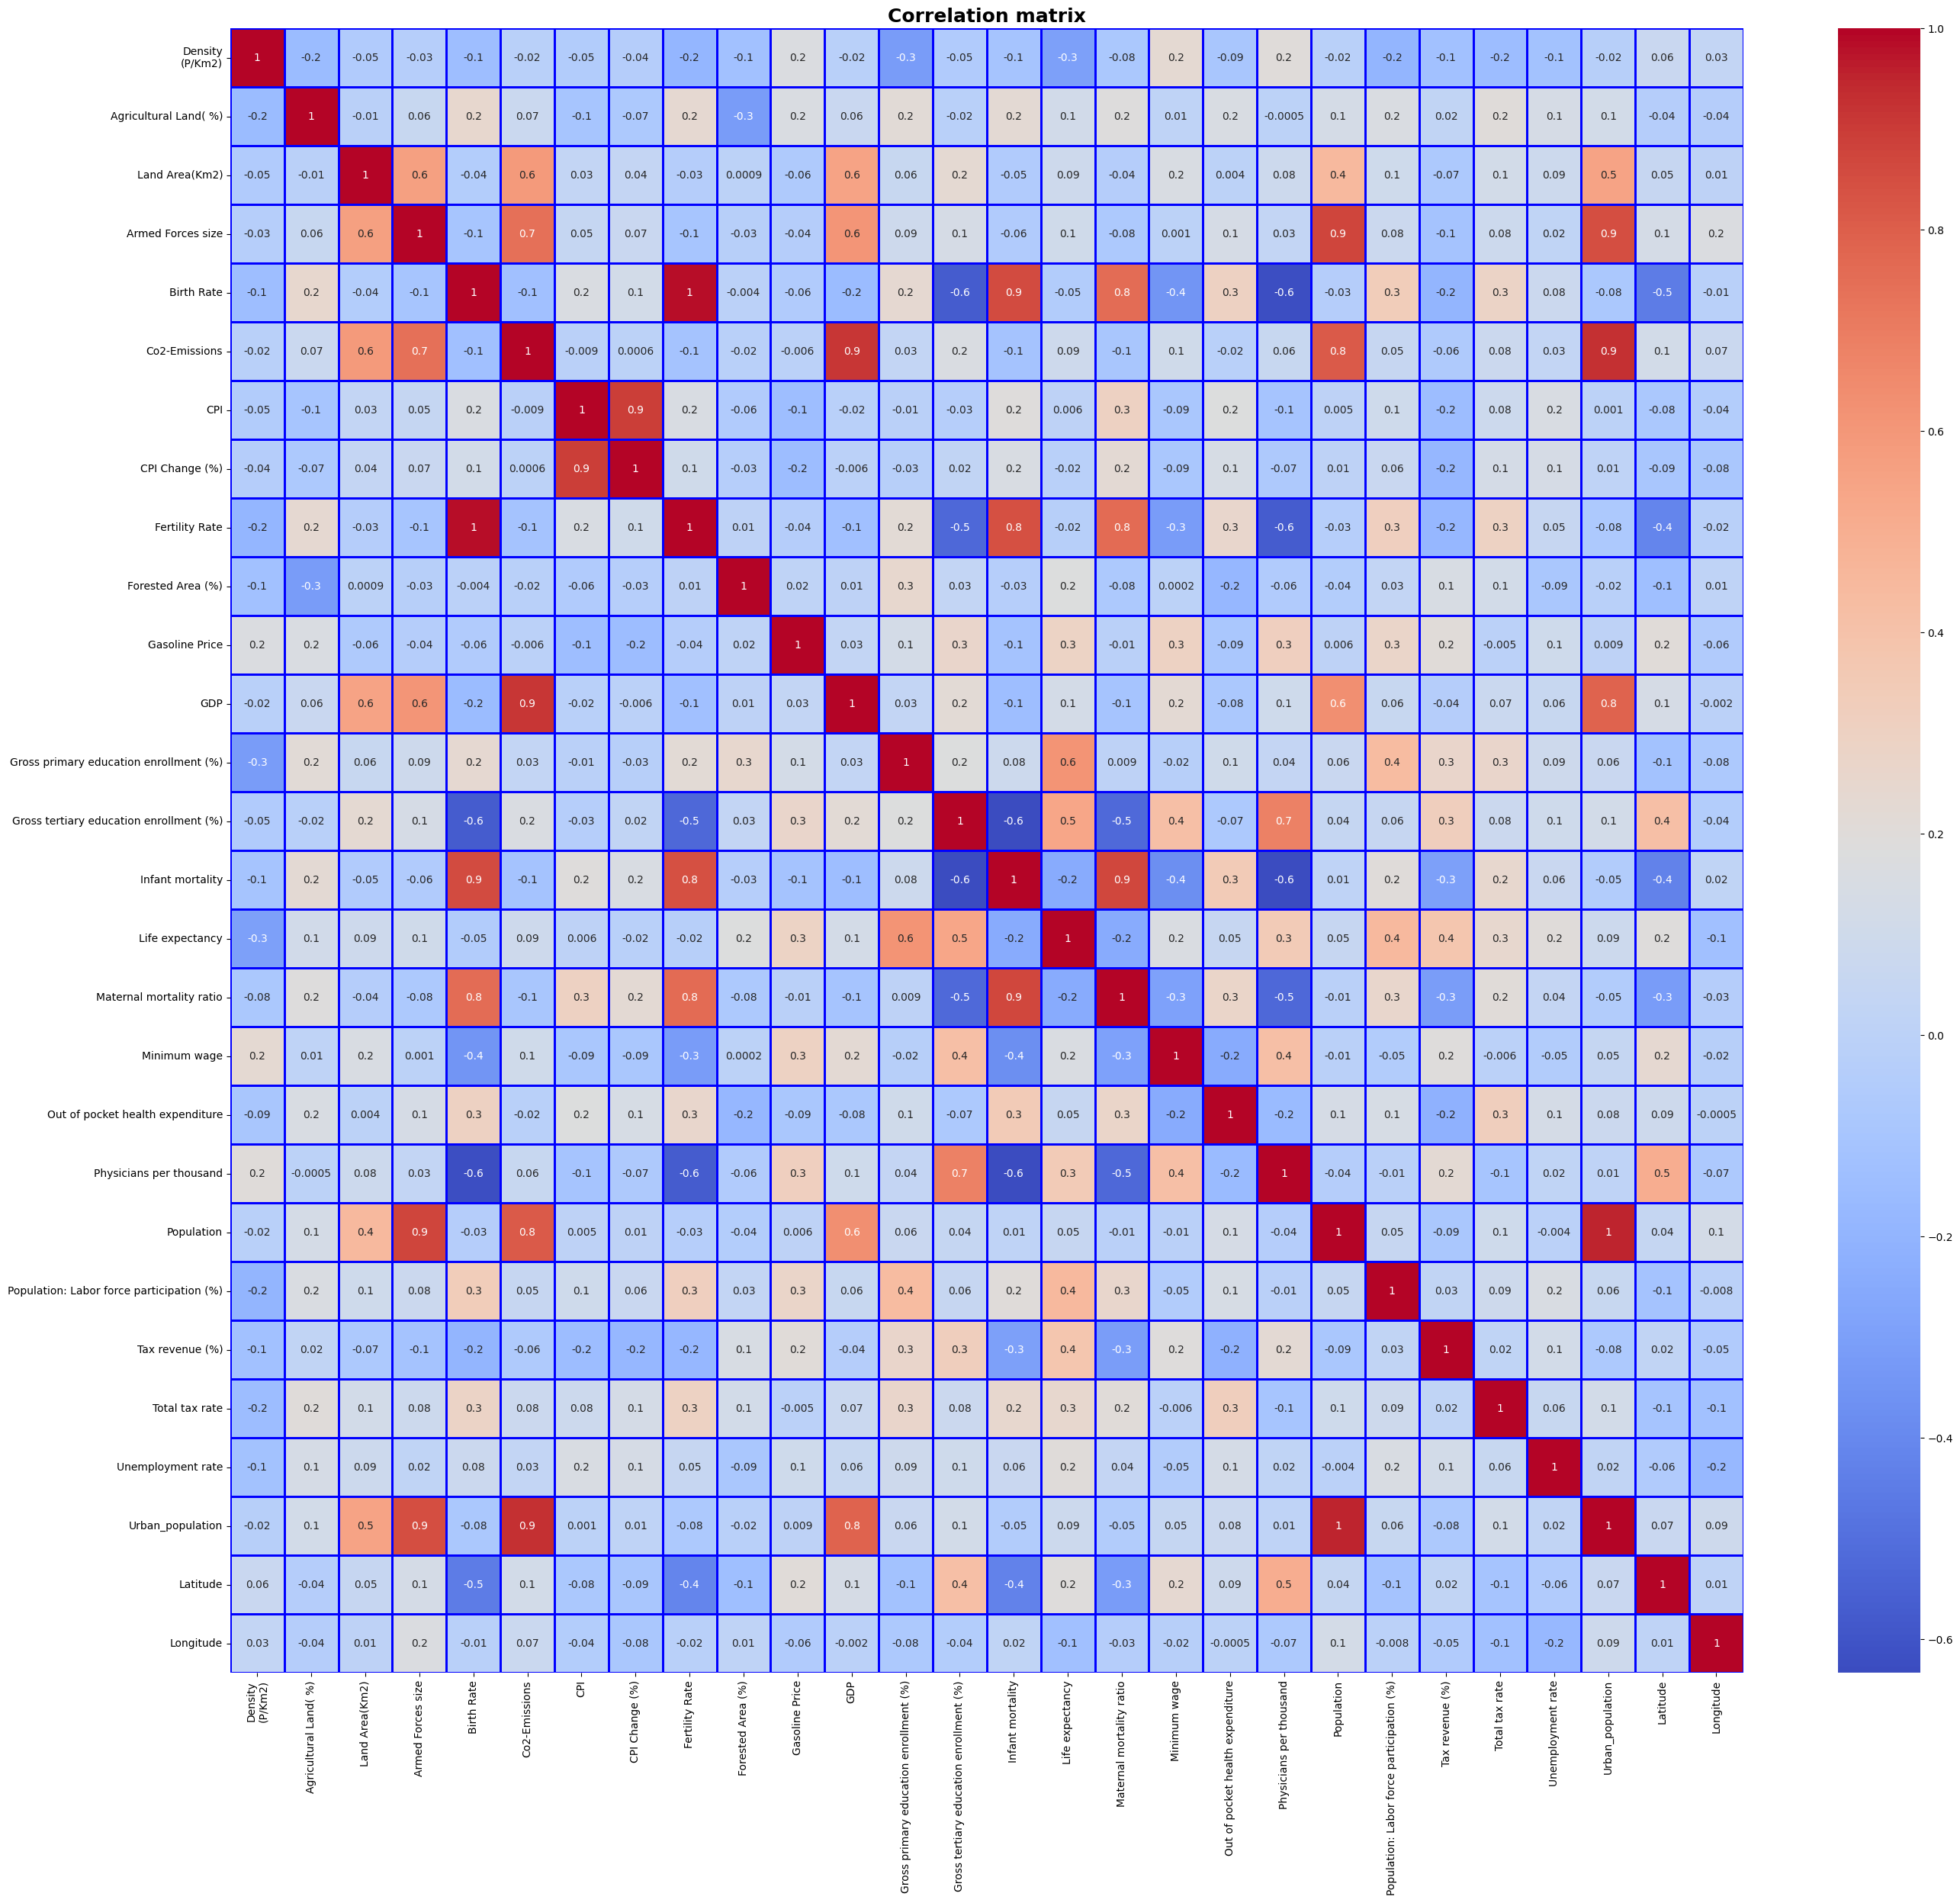

In [19]:
#[2]]
#Generate the heat map
plt.figure(figsize=(32, 28), facecolor='white')
sns.heatmap(numerical_var.corr(),
            annot=True,
            fmt='.1g',
            cmap='coolwarm',
            linecolor='blue',
            linewidths=1)
plt.title('Correlation matrix',
          fontsize=18,
          fontweight='bold');

In [111]:
#Selecting health related variables
health_var=data[['Birth Rate','Fertility Rate','Life expectancy','Maternal mortality ratio','Physicians per thousand']]

Text(0.5, 1.0, 'Density and Scatter Plots of Health related variables')

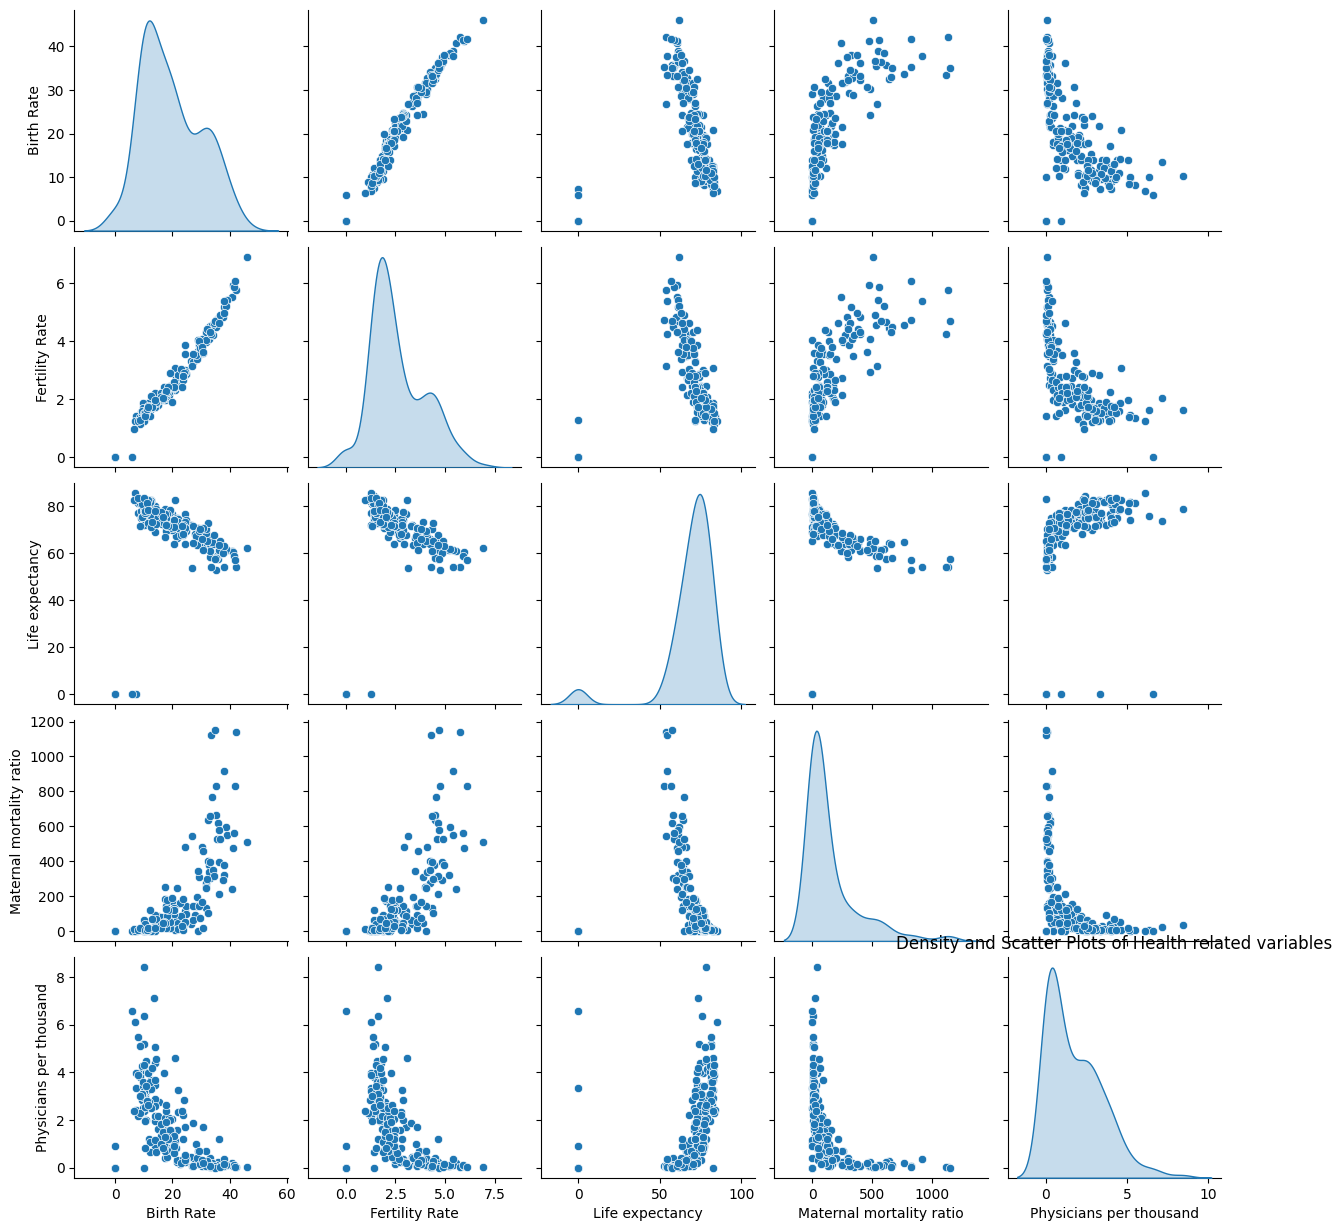

In [21]:
#kernel density estimate
sns.pairplot(health_var, diag_kind='kde')
plt.title('Density and Scatter Plots of Health related variables')
#plt.savefig('distribution of health related variables')

# Scaling of features

In [22]:
#scaling features
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
data_scaled=scaler.fit_transform(data)
data=pd.DataFrame(data_scaled)
data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.723191,-0.150048,-1.691115,0.904519,-0.017705,0.510345,1.243586,-0.823602,-0.408509,-0.197969,...,2.378516,-0.886793,-0.007879,-0.366147,-0.590703,1.493800,0.938301,-0.160541,0.625888,0.716706
1,-1.705426,-0.127295,-1.655472,0.238996,-0.343732,-0.363761,-0.753360,-0.011461,1.333258,-0.203001,...,1.288950,-0.340634,-0.251604,-0.043848,0.494097,-0.077208,1.169786,-0.268816,0.928022,0.000597
2,-1.687661,-0.171283,-0.889151,-0.901265,0.886679,0.493642,0.451943,-0.451629,-1.652628,-0.026045,...,-0.170562,-0.031935,0.026832,-0.731104,2.663696,1.254537,1.049260,0.131516,0.378575,-0.278195
3,-1.669897,-0.097464,-1.726758,0.101455,-0.358520,-0.388815,-1.194983,0.053634,-1.599308,-0.207948,...,0.250061,0.923843,-0.270839,-2.683857,-1.675502,-1.729474,-1.189064,-0.291410,0.984684,-0.280271
4,-1.652132,-0.167239,-1.619829,0.434216,0.293151,-0.063113,2.038121,-0.355536,-0.088592,-0.166316,...,0.098028,-0.928349,-0.050937,0.989405,-0.602367,0.487091,0.129060,-0.009034,-1.264666,-0.033963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.652132,-0.164205,1.481096,-0.586251,0.118159,0.566020,-0.165172,-0.932094,-0.959476,-0.008809,...,0.726429,0.086795,-0.073860,0.145739,-1.675502,1.579573,0.494462,0.046133,-0.526465,-1.306220
191,1.669897,-0.021622,1.498918,0.070397,-0.185570,1.064316,-0.274132,-0.851500,-0.568467,0.025851,...,0.609871,-0.566222,0.396768,0.984665,0.552419,-0.032064,-0.804531,0.182925,-0.206726,1.327761
192,1.687661,-0.152070,1.552382,0.305549,-0.082683,-0.277464,1.046880,1.885601,0.977796,-0.195613,...,2.510277,-0.868984,-0.069384,-0.882774,-1.675502,-0.528647,1.280745,-0.146118,-0.144140,0.427598
193,1.705426,-0.167744,1.588025,-0.249053,0.034789,-0.344275,1.600355,-0.305940,-0.070819,-0.202265,...,-0.200969,-0.346571,-0.147660,0.851954,0.214148,-1.025229,0.997607,-0.186441,-1.345545,0.116294


In [23]:
#counting number of columns
data.columns #remove life expectancy

RangeIndex(start=0, stop=35, step=1)

In [24]:
#Rename columns
data=data.rename(index=str,columns={0:'Country',1: 'Density\n(P/Km2)', 2:'Abbreviation', 3:'Agricultural Land(%)',
       4:'Land Area(Km2)', 5:'Armed Forces size', 6:'Birth Rate', 7:'Calling Code',
       8:'Capital/Major City', 9:'Co2-Emissions', 10:'CPI', 11:'CPI Change (%)',
       12:'Currency-Code', 13:'Fertility Rate',14: 'Forested Area (%)',
       15:'Gasoline Price', 16:'GDP', 17:'Gross primary education enrollment (%)',
       18:'Gross tertiary education enrollment (%)',19: 'Infant mortality',
       20:'Largest city', 21:'Life expectancy', 22:'Maternal mortality ratio',
       23:'Minimum wage', 24:'Official language', 25:'Out of pocket health expenditure',
       26:'Physicians per thousand', 27:'Population',
       28:'Population: Labor force participation (%)',29:'Tax revenue (%)',
       30:'Total tax rate', 31:'Unemployment rate', 32:'Urban_population', 33:'Latitude',
       34:'Longitude'})

In [25]:
# Target variable
y = data['Life expectancy']
# Train data
X = data.drop('Life expectancy', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)


In [26]:
#Creating a function to output evalution metrics
def eval_dict_metrics(y_train, y_train_predict, y_test, y_test_predict):
    eval_metrics = {
                'MAE score Train' : round(metrics.mean_absolute_error(y_train, y_train_predict), 6),
                'MAE score Test' : round(metrics.mean_absolute_error(y_test, y_test_predict), 6),
                'RMSE score Train' : round(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)), 6),
                'RMSE score Test' : round(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)), 6),
                'R^2 score Train' : round(metrics.r2_score(y_train, y_train_predict), 6),
                'R^2 score Test' : round(metrics.r2_score(y_test, y_test_predict), 6)
                }
    return eval_metrics

# Linear Regression with all Features

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_train_predict = model_lr.predict(X_train)
y_test_predict = model_lr.predict(X_test)
metrics_lr = eval_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_lr

{'MAE score Train': 0.37177,
 'MAE score Test': 0.523743,
 'RMSE score Train': 0.522203,
 'RMSE score Test': 0.783008,
 'R^2 score Train': 0.700098,
 'R^2 score Test': 0.492928}

In [28]:
#[3]
#Generate feature coefficients for linear equation
coefficients = model_lr.coef_
intercept = model_lr.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)
#Print variables and coefficients
coef_dict = {col: coef for col, coef in zip(X.columns, coefficients)}
print("Coefficients with variable names:", coef_dict)

Intercept: 0.02603944909348372
Coefficients: [ 0.12502782  0.19230597 -0.04729572 -0.02090617 -0.09390596  0.16015533
 -0.07787743  0.10788944  0.00390271  0.08206506  0.22534779 -0.23100881
 -0.04139097  0.34514354  0.04538428  0.04029921 -0.12670986  0.19435741
  0.43758613  0.14097752  0.02909387 -0.29590615  0.03943272 -0.06415178
 -0.0735876  -0.00992101 -0.13301738  0.27653566  0.17664323  0.15616866
  0.08870697  0.10547346  0.17671277 -0.16367346]
Coefficients with variable names: {'Country': 0.12502781941580593, 'Density\n(P/Km2)': 0.1923059717711919, 'Abbreviation': -0.04729571596352779, 'Agricultural Land(%)': -0.020906170471759487, 'Land Area(Km2)': -0.09390596454111272, 'Armed Forces size': 0.1601553326187967, 'Birth Rate': -0.0778774320595914, 'Calling Code': 0.10788943980103109, 'Capital/Major City': 0.0039027122243110637, 'Co2-Emissions': 0.08206505741650369, 'CPI': 0.2253477888510831, 'CPI Change (%)': -0.23100880752498879, 'Currency-Code': -0.041390974084088795, 'Fert

In [29]:
#[4]
#Generate model summary
import statsmodels.api as sm
X_sm=sm.add_constant(X_train)
sm_mod=sm.OLS(y_train, X_sm).fit()
print(sm_mod.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     6.935
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           1.46e-14
Time:                        12:16:13   Log-Likelihood:                -104.62
No. Observations:                 136   AIC:                             279.2
Df Residuals:                     101   BIC:                             381.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

For test data:

In [30]:
import statsmodels.api as sm
X_sm=sm.add_constant(X_test)
sm_mod_test=sm.OLS(y_test, X_sm).fit()
print(sm_mod_test.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           5.34e-10
Time:                        12:16:13   Log-Likelihood:                 3.9622
No. Observations:                  59   AIC:                             62.08
Df Residuals:                      24   BIC:                             134.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [31]:
sm_mod_test.tvalues

,0
const,-0.536121
Country,2.033519
Density\n(P/Km2),-3.305049
Abbreviation,-2.259896
Agricultural Land(%),-0.409658
Land Area(Km2),-0.842465
Armed Forces size,0.129511
Birth Rate,0.865234
Calling Code,0.713253
Capital/Major City,-0.658651


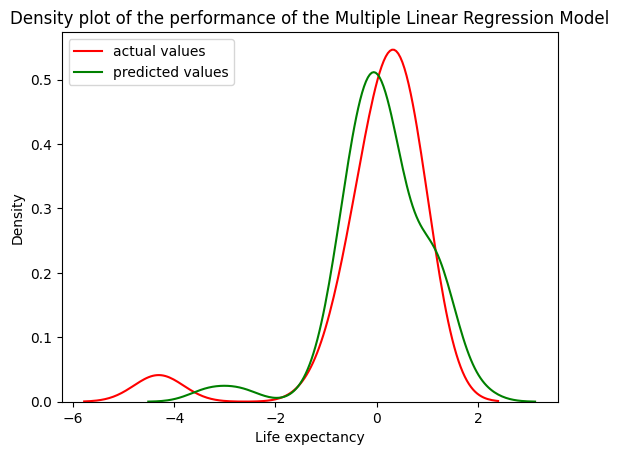

In [32]:
#Density plots for MLR

plt.figure()
ax1=sns.distplot(y_test,hist=False,color='r', label='actual values')
sns.distplot(y_test_predict, hist=False, color="g", label="predicted values")
plt.title('Density plot of the performance of the Multiple Linear Regression Model')
plt.legend()
plt.show()

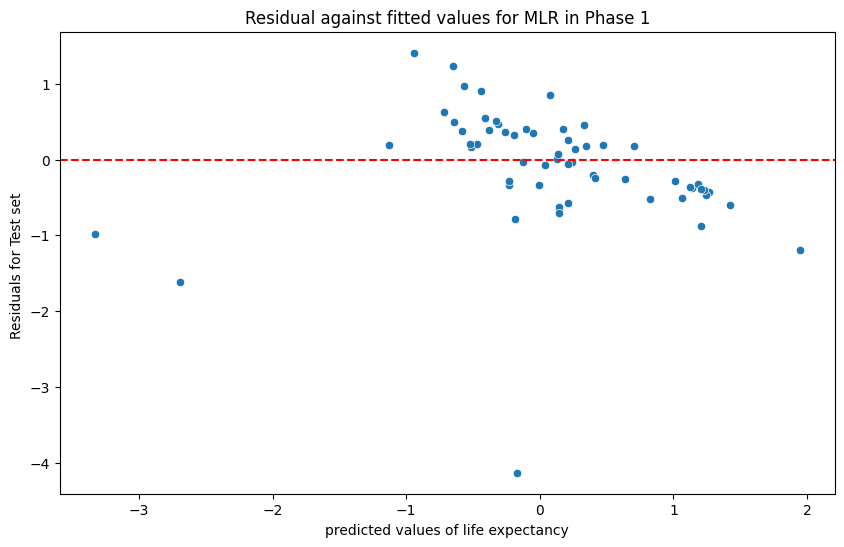

In [33]:
#Residual plots for the test set
train_Residuals=y_train-y_train_predict
test_Residuals=y_test-y_test_predict
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_predict,y=test_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals for Test set ')
plt.title('Residual against fitted values for MLR in Phase 1')
plt.axhline(y=0, color='red', linestyle='--')


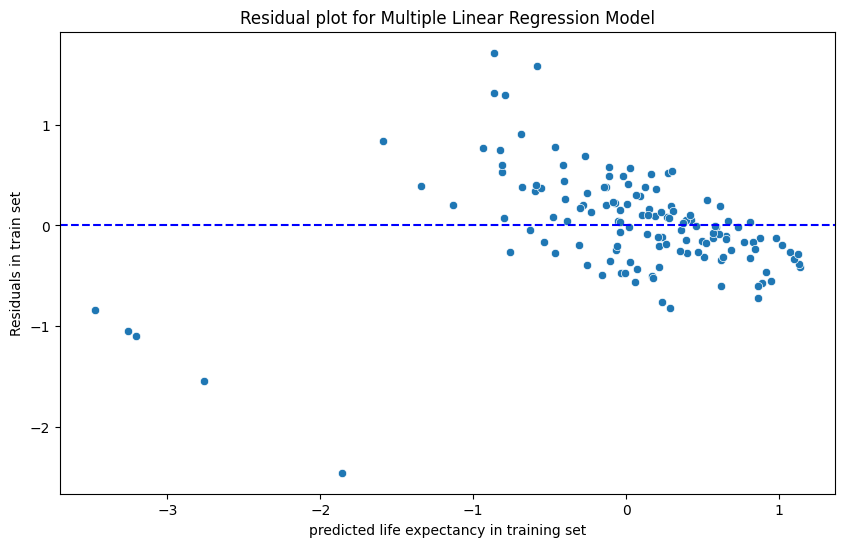

In [34]:
#Residual plots on the training set
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_predict,y=train_Residuals)
plt.xlabel('predicted life expectancy in training set')
plt.ylabel('Residuals in train set')
plt.title('Residual plot for Multiple Linear Regression Model')
plt.axhline(y=0, color='blue', linestyle='--')

# Random Forest Regression with all Features

In [35]:
#Target variable
y = data['Life expectancy']
# Train data
X = data.drop('Life expectancy', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)


In [36]:
#Generate performance metrics
model_rf = ensemble.RandomForestRegressor(n_estimators=10,
                                         max_depth=10,
                                         random_state=42)
model_rf.fit(X_train, y_train)
y_train_predict = model_rf.predict(X_train)
y_test_predict = model_rf.predict(X_test)
metrics_rf = eval_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_rf

{'MAE score Train': 0.109977,
 'MAE score Test': 0.217602,
 'RMSE score Train': 0.267755,
 'RMSE score Test': 0.350727,
 'R^2 score Train': 0.921155,
 'R^2 score Test': 0.898264}

In [37]:
#View hyperparameters
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [38]:
#Import model and execute hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Hyperparameter grid
param_grid = {'n_estimators' : [5,10,15,20], # Number of trees
              'min_samples_split': [2, 5, 7, 10], # Minimum number of samples to split
              'max_depth': [5, 10, 20, 30, 50], # Maximum tree depth
              'min_samples_leaf' : [1, 2, 3, 4], # Minimum number of objects in a sheet
              'max_features' : ['auto','sqrt', 'log2'],
              'bootstrap': [True, False]}# Maximum number of features that will be used by each of the trees

rf = RandomForestRegressor()
# Create an object gridsearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,verbose=2)

# Get the best parameters
grid_search.fit(X_train, y_train)


# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_train_predict = best_rf.predict(X_train)
y_test_predict = best_rf.predict(X_test)


metrics_rf_grid = eval_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_rf_grid

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


{'MAE score Train': 0.0,
 'MAE score Test': 0.140261,
 'RMSE score Train': 0.0,
 'RMSE score Test': 0.193446,
 'R^2 score Train': 1.0,
 'R^2 score Test': 0.96905}

In [39]:
#[6]
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

#Initiate model
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

#Generate feature importance
importances = rf.feature_importances_

# View feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                                      Feature  Importance
29                             Total tax rate    0.217893
18    Gross tertiary education enrollment (%)    0.160795
19                           Infant mortality    0.120434
6                                  Birth Rate    0.112151
31                           Urban_population    0.080440
13                             Fertility Rate    0.076734
16                                        GDP    0.052962
4                              Land Area(Km2)    0.040673
17     Gross primary education enrollment (%)    0.039714
21                   Maternal mortality ratio    0.036751
2                                Abbreviation    0.013728
11                             CPI Change (%)    0.009528
30                          Unemployment rate    0.006521
3                        Agricultural Land(%)    0.005975
32                                   Latitude    0.005873
33                                  Longitude    0.005869
15            

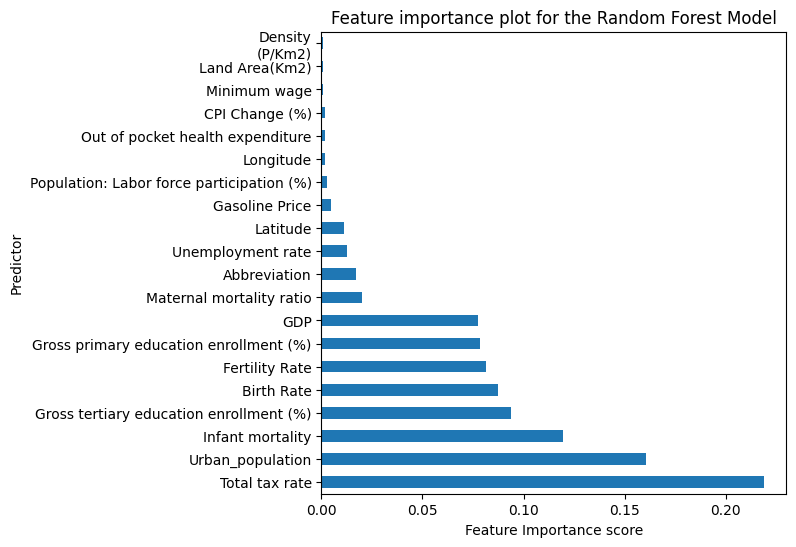

In [40]:
#Generate the feature importance plots
plt.rcParams['figure.figsize'] = (6, 6)
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Feature Importance score')
plt.ylabel('Predictor')
plt.title('Feature importance plot for the Random Forest Model')
plt.show()

In [41]:
#View Best parameters
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [112]:
#Visualize top 20 most importanat features
highest_n_features = 20


most_importa_features = feature_importance_df.head(highest_n_features)['Feature'].tolist()


X_train_selected = X_train[most_importa_features]
X_test_selected = X_test[most_importa_features]

print(f"most important features: {most_importa_features}")


most important features: ['Total tax rate', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Birth Rate', 'Urban_population', 'Fertility Rate', 'GDP', 'Land Area(Km2)', 'Gross primary education enrollment (%)', 'Maternal mortality ratio', 'Abbreviation', 'CPI Change (%)', 'Unemployment rate', 'Agricultural Land(%)', 'Latitude', 'Longitude', 'Gasoline Price', 'Population: Labor force participation (%)', 'Calling Code', 'Physicians per thousand']


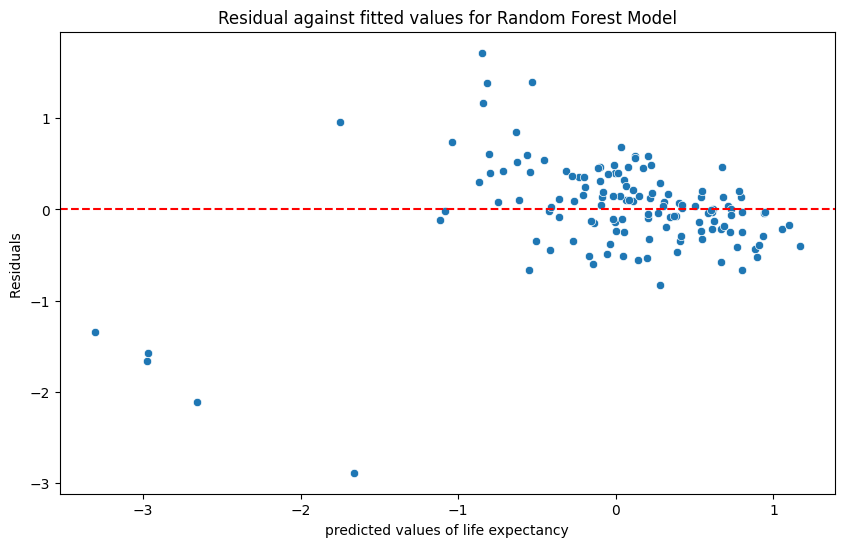

In [113]:
#Visualize residual plot for Random Forest Model with training set
train_Residuals_rand=y_train-y_train_predict
test_Residuals_rand=y_test-y_test_predict
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_predict,y=train_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals ')
plt.title('Residual against fitted values for Random Forest Model')
plt.axhline(y=0, color='red', linestyle='--')

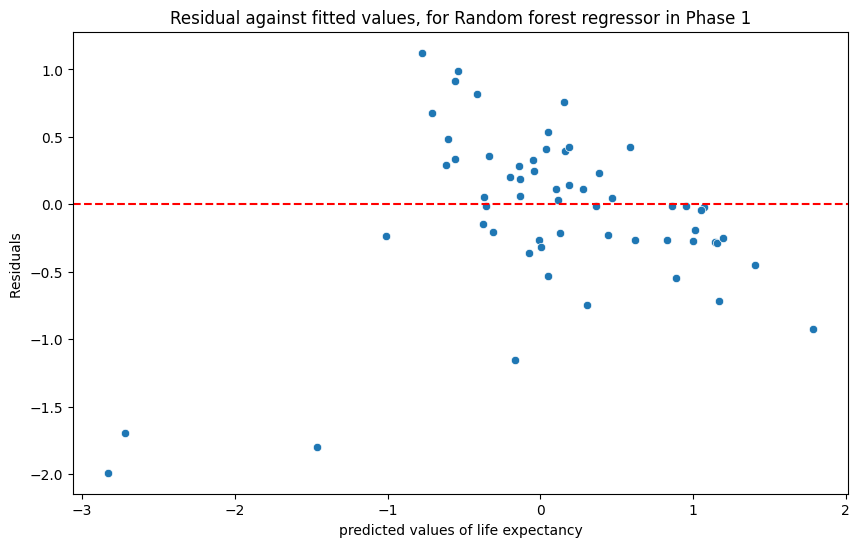

In [114]:
#Generate residual plots with test set
train_Residuals_rand=y_train-y_train_predict
test_Residuals_rand=y_test-y_test_predict
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_predict,y=test_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals ')
plt.title('Residual against fitted values, for Random forest regressor in Phase 1')
plt.axhline(y=0, color='red', linestyle='--')

# Gradient Boosting Model with all features

In [45]:
#Target variable
y = data['Life expectancy']
# Train data
X = data.drop('Life expectancy', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)


In [46]:
#Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = ensemble.GradientBoostingRegressor(random_state=42)
# Model traning
model_gbr.fit(X_train, y_train)
# Prediction and metrics
y_train_predict = model_gbr.predict(X_train)
y_test_predict = model_gbr.predict(X_test)
metrics_gbr = eval_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_gbr

{'MAE score Train': 0.018861,
 'MAE score Test': 0.182488,
 'RMSE score Train': 0.022921,
 'RMSE score Test': 0.305218,
 'R^2 score Train': 0.999422,
 'R^2 score Test': 0.922952}

In [47]:
#View best parameters
model_gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [48]:
#Import model and necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Grid Search
param_grid = {'alpha':[0.8,0.9,1.0],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#Fit model to training set
grid_search.fit(X_train, y_train)

#Evaluate best parameter
best_gb_model = grid_search.best_estimator_

#Use the best estimator to make predictions
y_train_predict = best_gb_model.predict(X_train)
y_test_predict = best_gb_model.predict(X_test)

#Calculate metrics
metrics_best_gb = {
    'MAE score Train': mean_absolute_error(y_train, y_train_predict),
    'MAE score Test': mean_absolute_error(y_test, y_test_predict),
    'RMSE score Train': np.sqrt(mean_squared_error(y_train, y_train_predict)),
    'RMSE score Test': np.sqrt(mean_squared_error(y_test, y_test_predict)),
    'R^2 score Train': r2_score(y_train, y_train_predict),
    'R^2 score Test': r2_score(y_test, y_test_predict)
}


print(metrics_best_gb)
print('best estimator',best_gb_model)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'MAE score Train': 6.190588438630429e-05, 'MAE score Test': 0.16577639113817624, 'RMSE score Train': 7.755470285990021e-05, 'RMSE score Test': 0.33978047222661417, 'R^2 score Train': 0.999999993385204, 'R^2 score Test': 0.904515126031488}
best estimator GradientBoostingRegressor(alpha=0.8, max_depth=5, n_estimators=200,
                          random_state=42)


In [49]:
#View best parameter
grid_search.best_params_

{'alpha': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Feature importance plot

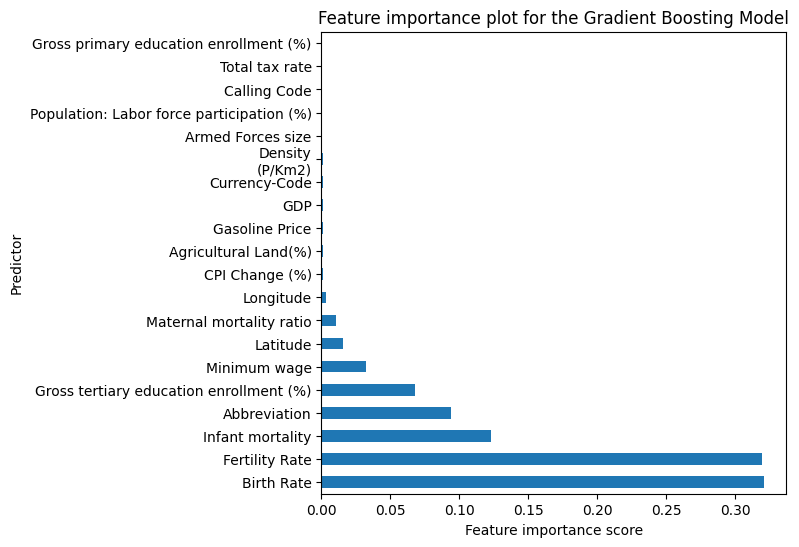

In [115]:
#Visualize Feature Importance Plot for Gradient Boosting Model
importances = best_gb_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Feature importance score')
plt.ylabel('Predictor')
plt.title('Feature importance plot for the Gradient Boosting Model' )
plt.show()



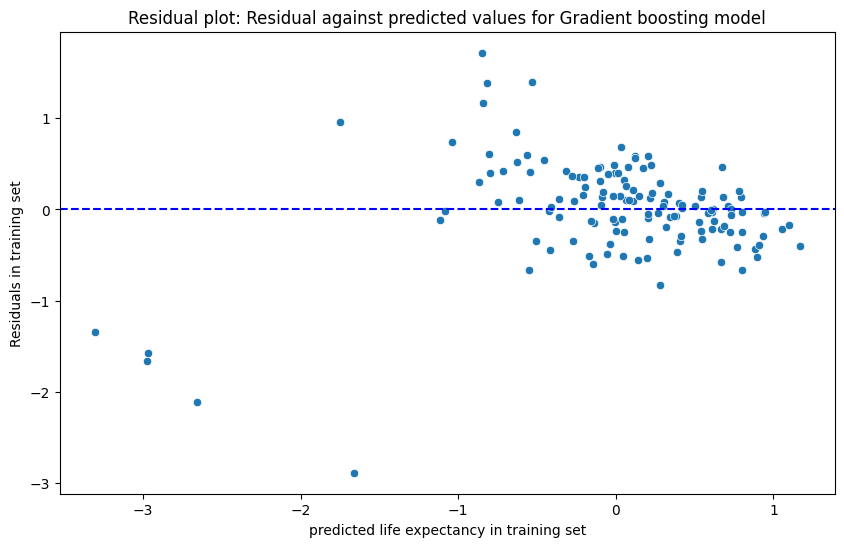

In [116]:
#Visualize Residual plot for Gradient boosting model
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_predict,y=train_Residuals)
plt.xlabel('predicted life expectancy in training set')
plt.ylabel('Residuals in training set')
plt.title('Residual plot: Residual against predicted values for Gradient boosting model')
plt.axhline(y=0, color='blue', linestyle='--')

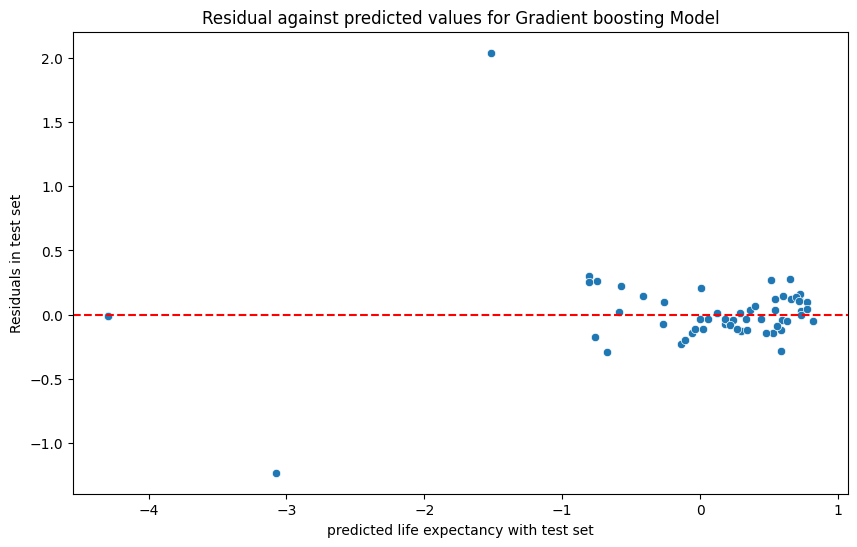

In [52]:
#Residual plots
train_Residuals=y_train-y_train_predict
test_Residuals=y_test-y_test_predict
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_predict,y=test_Residuals)
plt.xlabel('predicted life expectancy with test set')
plt.ylabel('Residuals in test set')
plt.title('Residual against predicted values for Gradient boosting Model')
plt.axhline(y=0, color='red', linestyle='--')

# Ridge Regression with all features

In [80]:
# Target veriable
y = data['Life expectancy']
# Train data
X = data.drop('Life expectancy', axis=1)

#split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)


In [81]:
#import necessary libraries
from sklearn.linear_model import Ridge, RidgeCV

In [82]:
#Initialise model and set alpha
ridge_mod=Ridge(alpha =0.5)

In [83]:
#Fit Model on train set
ridge_mod.fit(X_train,y_train)

Ridge(alpha=0.5)

In [84]:
#Test Generalization of Model
y_test_predict=ridge_mod.predict(X_test)
y_test_predict

array([-0.25225152,  1.1314977 , -1.10706228, -0.49264466, -0.04668369,
        0.6278609 ,  1.06738216,  0.83036232, -0.30616941, -0.70979378,
        0.33322797,  0.12632503,  1.25202342,  1.13598396,  1.16952042,
       -0.2437573 , -0.22862749, -0.17427274, -0.5895097 ,  0.22013404,
        0.32761873,  0.04247641,  1.93276345,  0.11966239,  0.99822902,
        0.20339406,  0.4100577 ,  1.19656208, -0.36237585, -0.11571707,
       -0.64337751,  0.26606813, -0.56067457, -0.45778331,  0.3715176 ,
        0.71058177, -0.18189332,  1.42608601, -2.68215124, -0.91035234,
       -0.52710891,  1.23372276,  0.14290374,  0.06702993, -3.29296326,
       -0.18395422,  0.470729  , -0.24288456, -0.62330225, -0.00459111,
        0.18766099,  0.24809687, -0.41659966,  1.23131095,  0.14178561,
       -0.09561991,  1.18844119,  0.1975093 , -0.44553036])

In [85]:
y_train_predict=ridge_mod.predict(X_train)

In [86]:
#Generate performance metrics
metrics_ridge_grid = eval_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_ridge_grid

{'MAE score Train': 0.370548,
 'MAE score Test': 0.517437,
 'RMSE score Train': 0.522355,
 'RMSE score Test': 0.779285,
 'R^2 score Train': 0.699924,
 'R^2 score Test': 0.497738}

In [87]:
#[4]hyper parameter tuning
alphas=np.logspace(2, 100, 50)
rid_model=RidgeCV(alphas=alphas, scoring='r2')

rid_model=rid_model.fit(X_train, y_train)
print(rid_model.alpha_)

100.0


In [88]:
best_ridge=Ridge(alpha=100)
best_ridge.fit(X_train,y_train)
best_pred_test=best_ridge.predict(X_test)
#Evaluation on test set
r_sq=r2_score(y_test,best_pred_test)
print('R squared on test set', r_sq)
mse=mean_absolute_error(y_test,best_pred_test)
rmse=np.sqrt(mse)
print('RMSE on test set', rmse)
mae=mean_absolute_error(y_test,best_pred_test)
print('MAE on test set', mae)
#Evaluation on training set

best_pred_train=best_ridge.predict(X_train)
r_sq=r2_score(y_train,best_pred_train)
print('R squared on train set', r_sq)
mse=mean_absolute_error(y_train,best_pred_train)
rmse=np.sqrt(mse)
print('RMSE on train set', rmse)
mae_train=mean_absolute_error(y_train,best_pred_train)
print('MAE on train set', mae_train)

R squared on test set 0.5989493681576243
RMSE on test set 0.6290098034499044
MAE on test set 0.39565333283608745
R squared on train set 0.5978239596049711
RMSE on train set 0.591948406487538
MAE on train set 0.3504029159431355


In [89]:
best_ridge.coef_

array([ 2.49389282e-02,  2.53013819e-02, -2.19164480e-02, -1.35517727e-04,
       -8.98496930e-03,  2.54862994e-02,  4.19644122e-02,  3.69114567e-02,
        9.30736026e-03,  5.89537930e-03,  2.63564774e-02, -4.57860885e-03,
        2.90437497e-03,  4.99427624e-02,  2.97751084e-02,  6.29897159e-02,
        1.33204646e-03,  1.69967417e-01,  1.77244991e-01, -4.76928817e-02,
        4.21546430e-03, -7.74843416e-02,  3.09251954e-02, -9.74320087e-03,
        4.43326347e-03,  7.45589780e-02,  4.68305204e-03,  1.60820142e-01,
        1.46288686e-01,  8.61568424e-02,  6.57429392e-02,  7.30596522e-03,
        6.96445258e-02, -7.56751059e-02])

Text(0.5, 1.0, ' Density plots for the Ridge regression Model in phase 1')

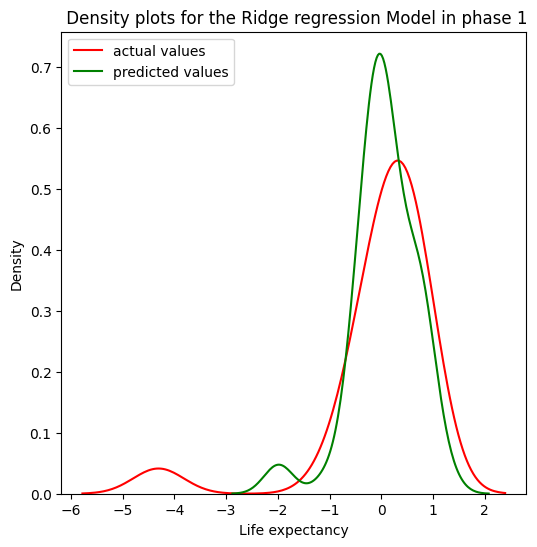

In [90]:
#Generate density plots
plt.figure()
ax1=sns.distplot(y_test,hist=False,color='r', label='actual values')
sns.distplot(best_pred_test, hist=False, color="g", label="predicted values")
plt.legend()
plt.title(' Density plots for the Ridge regression Model in phase 1')

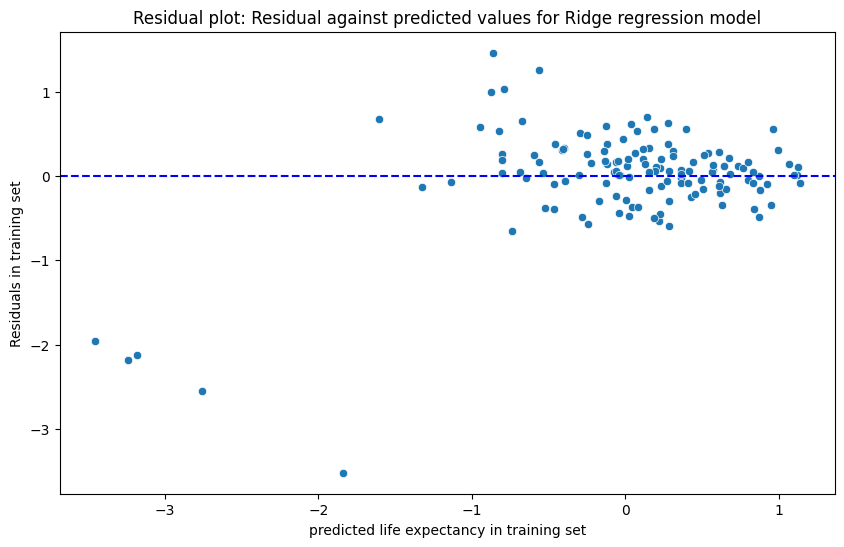

In [91]:
#Residual plots on training set
train_Residuals=y_train-best_pred_train
test_Residuals=y_test-best_pred_test
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_predict,y=train_Residuals)
plt.xlabel('predicted life expectancy in training set')
plt.ylabel('Residuals in training set')
plt.title('Residual plot: Residual against predicted values for Ridge regression model')
plt.axhline(y=0, color='blue', linestyle='--')

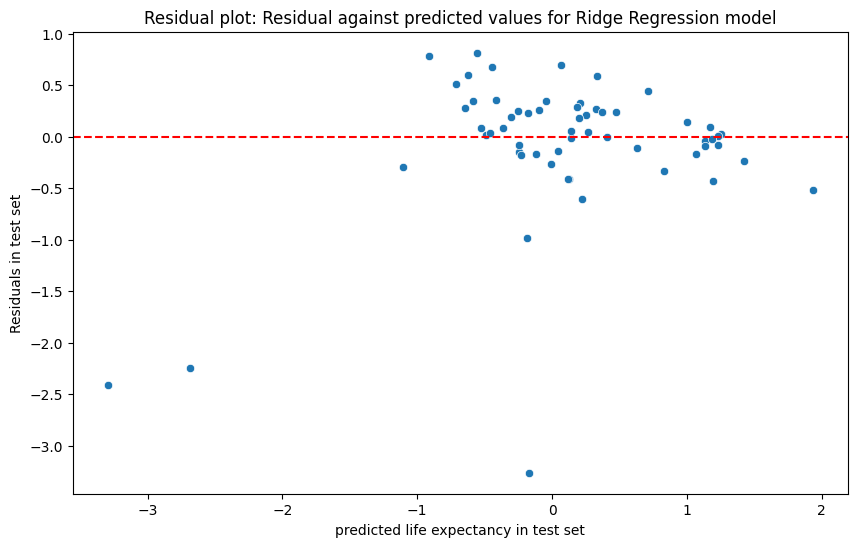

In [92]:
#Residual plots

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_predict,y=test_Residuals)
plt.xlabel('predicted life expectancy in test set')
plt.ylabel('Residuals in test set')
plt.title('Residual plot: Residual against predicted values for Ridge Regression model')
plt.axhline(y=0, color='red', linestyle='--')

In [94]:
#INSTALLING SHAP
%pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 21.5 MB/s eta 0:00:00


In [96]:
#Initiate SHAP for Ridge Regression
explain1_ridge=shap.Explainer(best_ridge.predict, X_test)
shap_val_ridge=explain1_ridge(X_test)

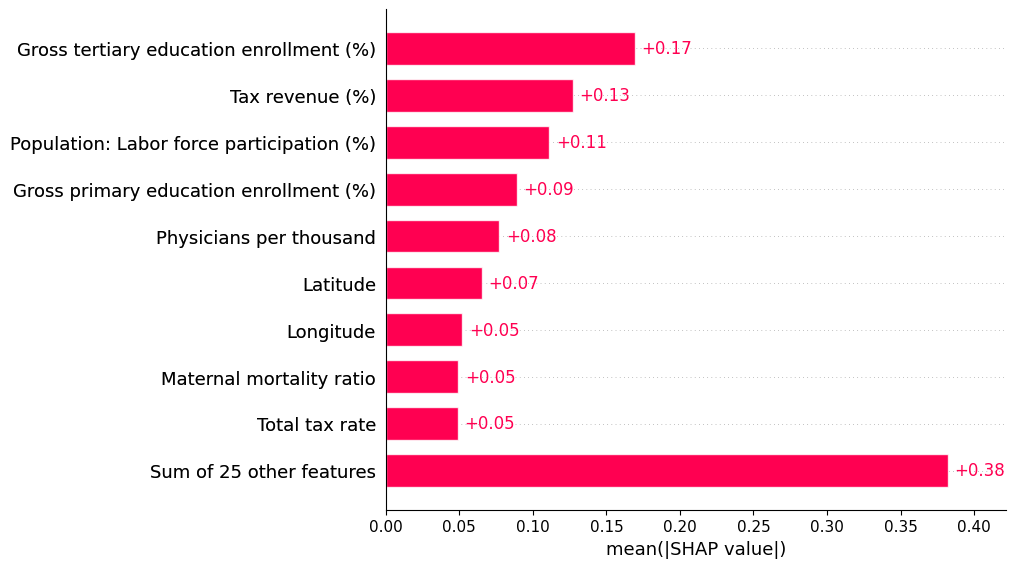

In [ ]:
#Generate feature score plot
shap.plots.bar(shap_val_ridge)

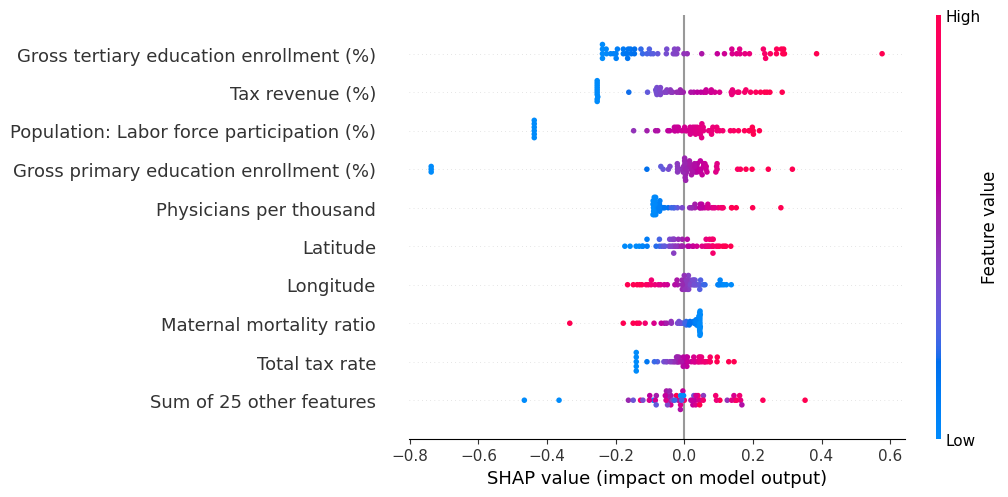

In [97]:
#Use beeswarm
shap.plots.beeswarm(shap_val_ridge)

#LASSO WITH ALL FEATURES

In [98]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

y = data['Life expectancy']
X = data.drop('Life expectancy', axis=1)

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

#Lasso Model with an assumed alpha
lasso_model = Lasso(0.01)

#Fit model to training set
lasso_model.fit(X_train, y_train)

#Predict target variable
y_test_predict = lasso_model.predict(X_test)
y_train_predict = lasso_model.predict(X_train)
metrics_ridge_grid = eval_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_ridge_grid


{'MAE score Train': 0.368502,
 'MAE score Test': 0.470011,
 'RMSE score Train': 0.534544,
 'RMSE score Test': 0.663188,
 'R^2 score Train': 0.685756,
 'R^2 score Test': 0.636244}

In [99]:
#Select predictor and response
y = data['Life expectancy']
X = data.drop('Life expectancy', axis=1)

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

#[4]Hyperparameter tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': np.logspace(-6, 0, 5)}


grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")


#Train the model using best parameter
best_lasso_mod = Lasso(alpha=best_alpha)
best_lasso_mod.fit(X_train, y_train)

#Calculate predited Life expectancy
y_train_pred = best_lasso_mod.predict(X_train)
y_test_pred = best_lasso_mod.predict(X_test)

#Estimate and print evaluation metrics on taining set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training Set R-squared: {train_r2:.6f}")
print(f"Training Set RMSE: {train_rmse:.6f}")
print(f"Training Set MAE: {train_mae:.6f}")

#Estimate evelaution metrics on taining set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Test Set R-squared: {test_r2:.6f}")
print(f"Test Set RMSE: {test_rmse:.6f}")
print(f"Test Set MAE: {test_mae:.6f}")



Best alpha: 0.03162277660168379
Training Set R-squared: 0.647818
Training Set RMSE: 0.565892
Training Set MAE: 0.372428
Test Set R-squared: 0.693574
Test Set RMSE: 0.608687
Test Set MAE: 0.431030


Best alpha: 0.03162277660168379
Training Set R-squared: 0.647818
Training Set RMSE: 0.565892
Training Set MAE: 0.372428
Test Set R-squared: 0.693574
Test Set RMSE: 0.608687
Test Set MAE: 0.431030

In [100]:
#Generate coefficients
best_lasso_mod.coef_

array([ 0.01507475,  0.        , -0.        , -0.        , -0.00412258,
        0.        ,  0.        ,  0.044946  ,  0.        ,  0.        ,
        0.0095539 ,  0.        ,  0.        ,  0.10370752,  0.00370953,
        0.02375697,  0.        ,  0.22157556,  0.35302898, -0.        ,
        0.        , -0.09942039,  0.        , -0.01520719, -0.        ,
        0.        ,  0.00524763,  0.23609911,  0.19607854,  0.09426894,
        0.06318762,  0.        ,  0.10255206, -0.08814479])

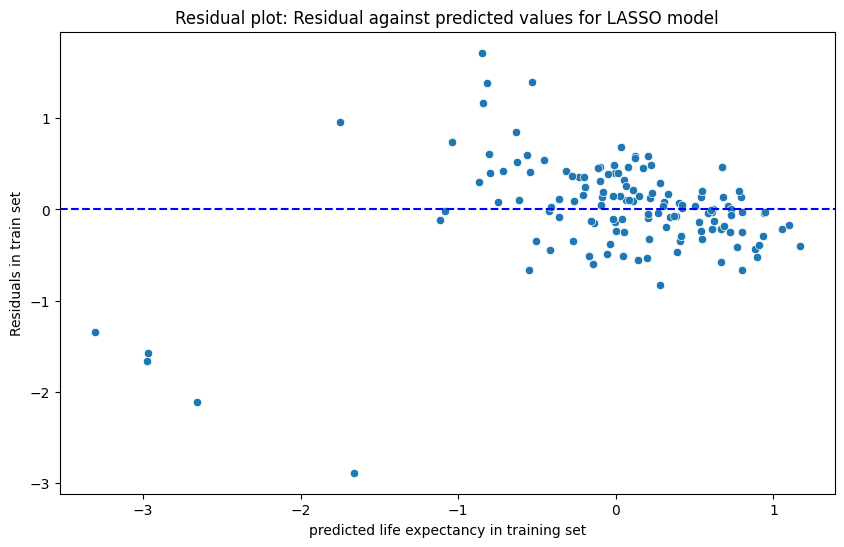

In [101]:
#Residual plots on training set
train_Residuals=y_train-y_train_pred
test_Residuals=y_test-y_test_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_predict,y=train_Residuals)
plt.xlabel('predicted life expectancy in training set')
plt.ylabel('Residuals in train set')
plt.title('Residual plot: Residual against predicted values for LASSO model')
plt.axhline(y=0, color='blue', linestyle='--')

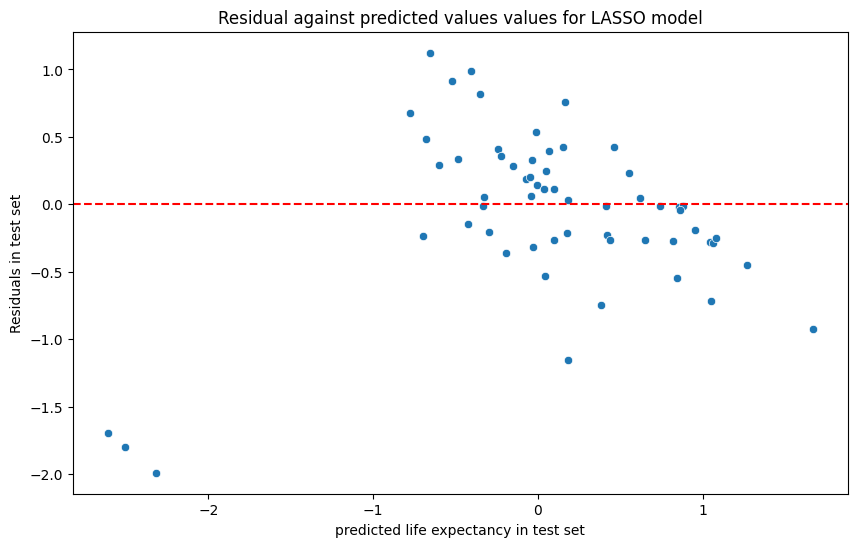

In [ ]:
#Residual plots on test set

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_pred,y=test_Residuals)
plt.xlabel('predicted life expectancy in test set')
plt.ylabel('Residuals in test set')
plt.title('Residual against predicted values values for LASSO model')
plt.axhline(y=0, color='red', linestyle='--')

Text(0.5, 1.0, ' Density plots of the LASSO Regression Model in phase 1')

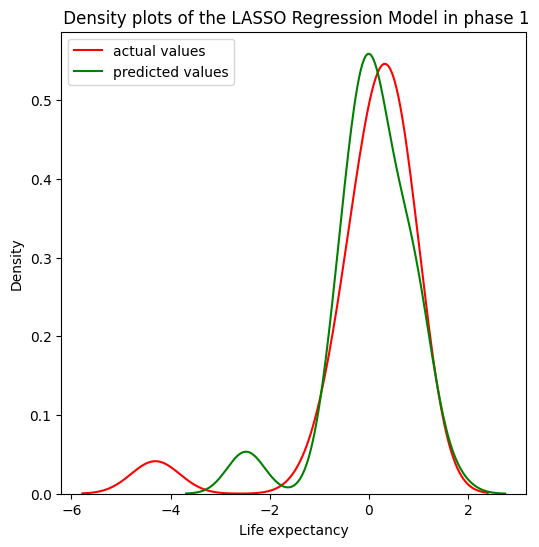

In [102]:
plt.figure()
ax1=sns.distplot(y_test,hist=False,color='r', label='actual values')
sns.distplot(y_test_pred, hist=False, color="g", label="predicted values")
plt.legend()
plt.title(' Density plots of the LASSO Regression Model in phase 1')

SHAPELY ADDITIVE EXPLANATIONS

In [103]:
#INSTALLING SHAP
%pip install shap
import shap

In [104]:
X_test.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land(%)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Maternal mortality ratio', 'Minimum wage',
       'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [105]:
X_train.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land(%)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Maternal mortality ratio', 'Minimum wage',
       'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

#SHAP Plot For Multiple linear Regression Model

In [106]:
#Initiate shap
explain1=shap.Explainer(model_lr.predict, X_test)
shap_val=explain1(X_test)

In [ ]:
shap_val

.values =
array([[ 0.08507948, -0.02662024, -0.03564367, ...,  0.05332207,
        -0.04155926, -0.22656521],
       [-0.17923159, -0.02516176,  0.06550149, ..., -0.00302459,
         0.23688928,  0.06263352],
       [ 0.1250593 , -0.05160896, -0.05165832, ..., -0.01428875,
        -0.07426457,  0.10269546],
       ...,
       [-0.08150313, -0.0508311 ,  0.02925781, ...,  0.05778741,
         0.20524166,  0.06819588],
       [-0.10371414, -0.05238682,  0.03515794, ...,  0.04185878,
         0.06161391, -0.00228616],
       [ 0.14727031, -0.02924552, -0.00530012, ..., -0.01324923,
        -0.07861255, -0.1254793 ]])

.base_values =
array([0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390

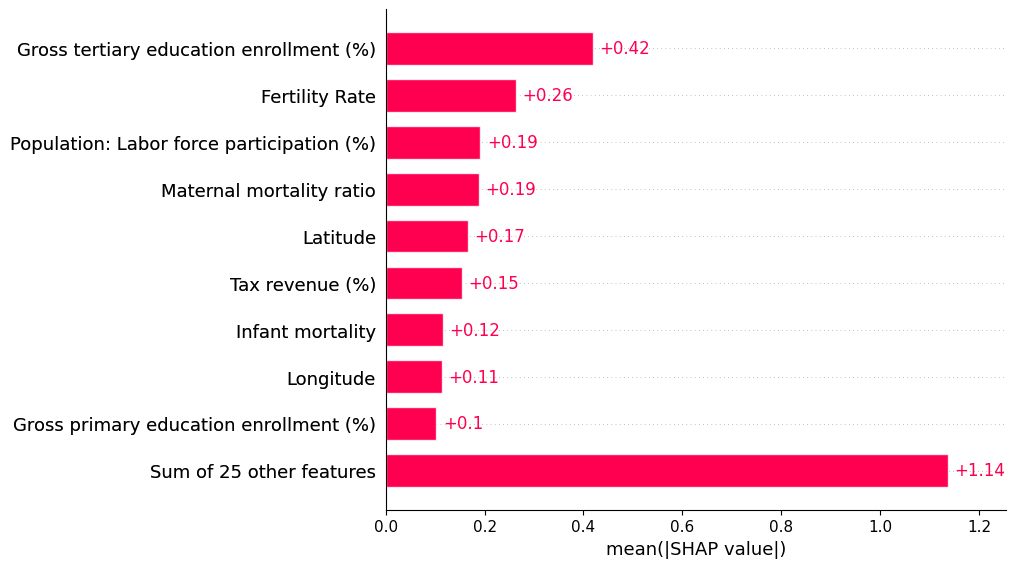

In [ ]:
#Visualize SHAP Plots
shap.plots.bar(shap_val)

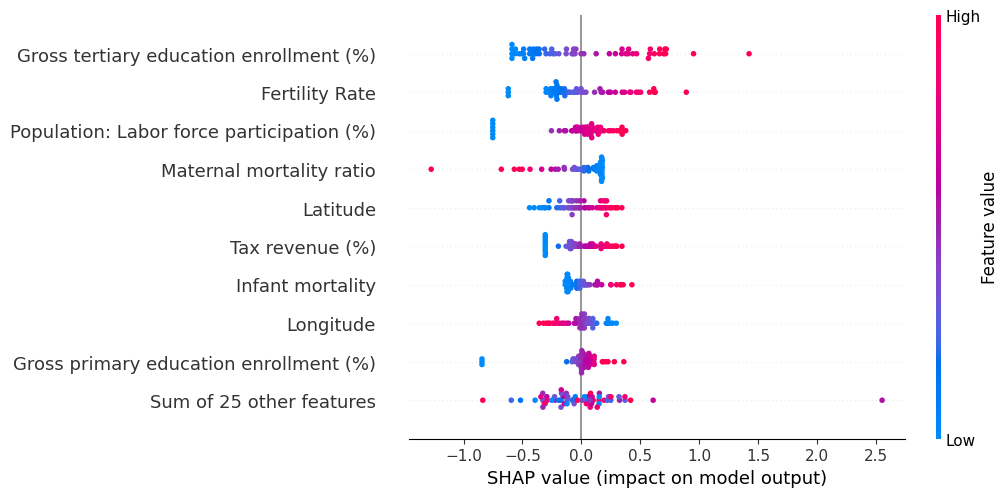

In [ ]:
#Use beeswarm
shap.plots.beeswarm(shap_val)

# SHAP Plots For LASSO Model

In [107]:
#Initiate shap
explain2=shap.Explainer(best_lasso_mod, X_test)
shap_val2=explain1(X_test)

In [108]:
shap_val2

.values =
array([[ 0.08507948, -0.02662024, -0.03564367, ...,  0.05332207,
        -0.04155926, -0.22656521],
       [-0.17923159, -0.02516176,  0.06550149, ..., -0.00302459,
         0.23688928,  0.06263352],
       [ 0.1250593 , -0.05160896, -0.05165832, ..., -0.01428875,
        -0.07426457,  0.10269546],
       ...,
       [-0.08150313, -0.0508311 ,  0.02925781, ...,  0.05778741,
         0.20524166,  0.06819588],
       [-0.10371414, -0.05238682,  0.03515794, ...,  0.04185878,
         0.06161391, -0.00228616],
       [ 0.14727031, -0.02924552, -0.00530012, ..., -0.01324923,
        -0.07861255, -0.1254793 ]])

.base_values =
array([0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390639, 0.08390639, 0.08390639, 0.08390639,
       0.08390639, 0.08390

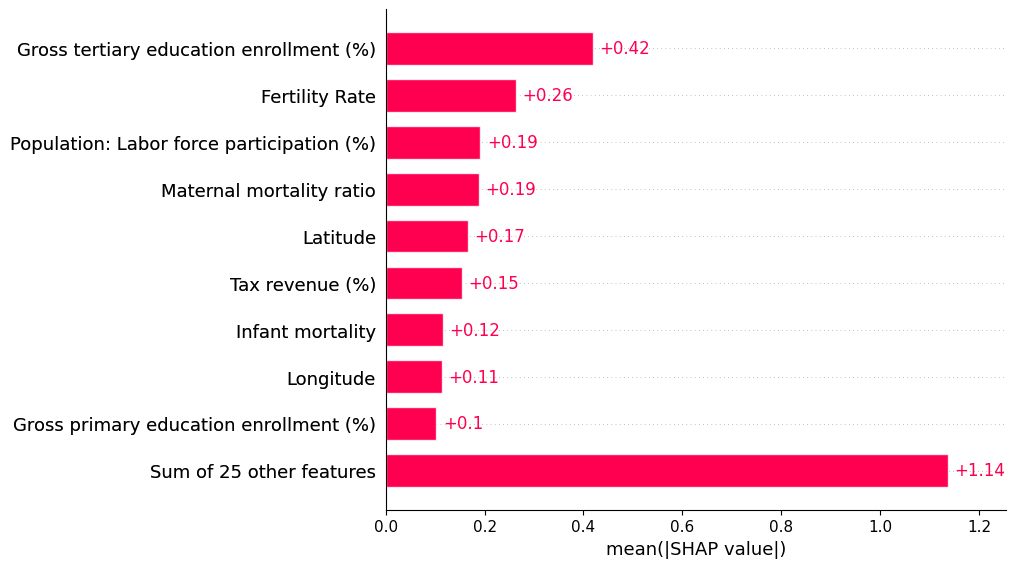

In [109]:
shap.plots.bar(shap_val2)

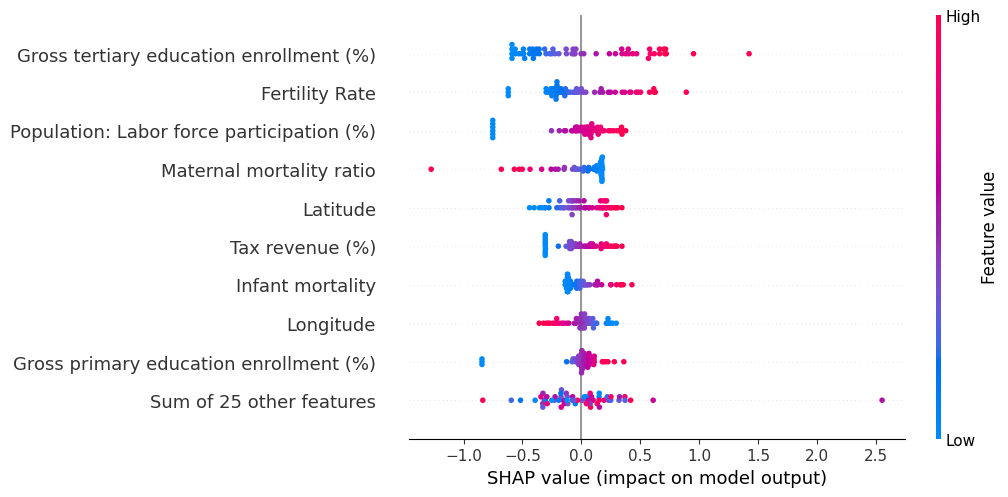

In [110]:
#Use beeswarm
shap.plots.beeswarm(shap_val2)

References:
1. Nelgiriyewithana W. Countries of the World 2023 [Internet].Kaggle;2023[cited 2024 July 8th]. Available from:https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-20232024,
2. Vishnnyakov D. Unemployment Rate Prediction[Internet]. Kaggle; 2023[cited 2024 August 9]. Available from:https://www.kaggle.com/code/dmitriyvishnyakov/unemployment-rate-prediction
3. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating  linear Regression coefficients and corresponding variables using ChatGPT on 20th July, 2024
4. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating  model summary for linear regression using ChatGPT on 20th August, 2024
5. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for calculating performance metrics, hyper parameter tuning for Ridge Regression was generated using ChatGPT on 18th August, 2024
6. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating  feature importance plots for Random Forest Regression generated using ChatGPT on 18th August, 2024

